## Heart Attack Prediction  - Data Cleaning & EDA

### 1. Imports and Setup

In [7]:
# Imports 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Setup

os.makedirs('../data/processed', exist_ok=True)
os.makedirs('../reports/figures', exist_ok=True)
sns.set_style("whitegrid")

### 2. Load and Inspect Data

In [4]:
df = pd.read_excel('../data/raw/data.xlsx', engine='openpyxl')

print("--- Data Info ---")
df.info()

print("\n--- Missing Values ---")
print(df.isnull().sum())

print(f"\n--- Number of Duplicate Rows ---")
print(df.duplicated().sum())

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB

--- Missing Values ---
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal     

### 3. Clean Data

In [5]:
# --- Clean Data ---
# Remove the 1 duplicate row found during inspection
if df.duplicated().sum() > 0:
    df.drop_duplicates(inplace=True)
    print(f"Dropped {df.duplicated().sum() + 1} duplicate row. New shape: {df.shape}")
else:
    print("No duplicate rows found.")

# Save the cleaned data for future use and for Tableau
df.to_csv('../data/processed/cleaned_heart_data.csv', index=False)
print("Cleaned data saved to 'data/processed/cleaned_heart_data.csv'")

Dropped 1 duplicate row. New shape: (302, 14)
Cleaned data saved to 'data/processed/cleaned_heart_data.csv'


### 4: Statistical Summary

In [8]:
# --- Statistical Summary ---
print("--- Statistical Summary of the Data ---")
df.describe().T

--- Statistical Summary of the Data ---


,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


### 5: Explore Categorical Variables

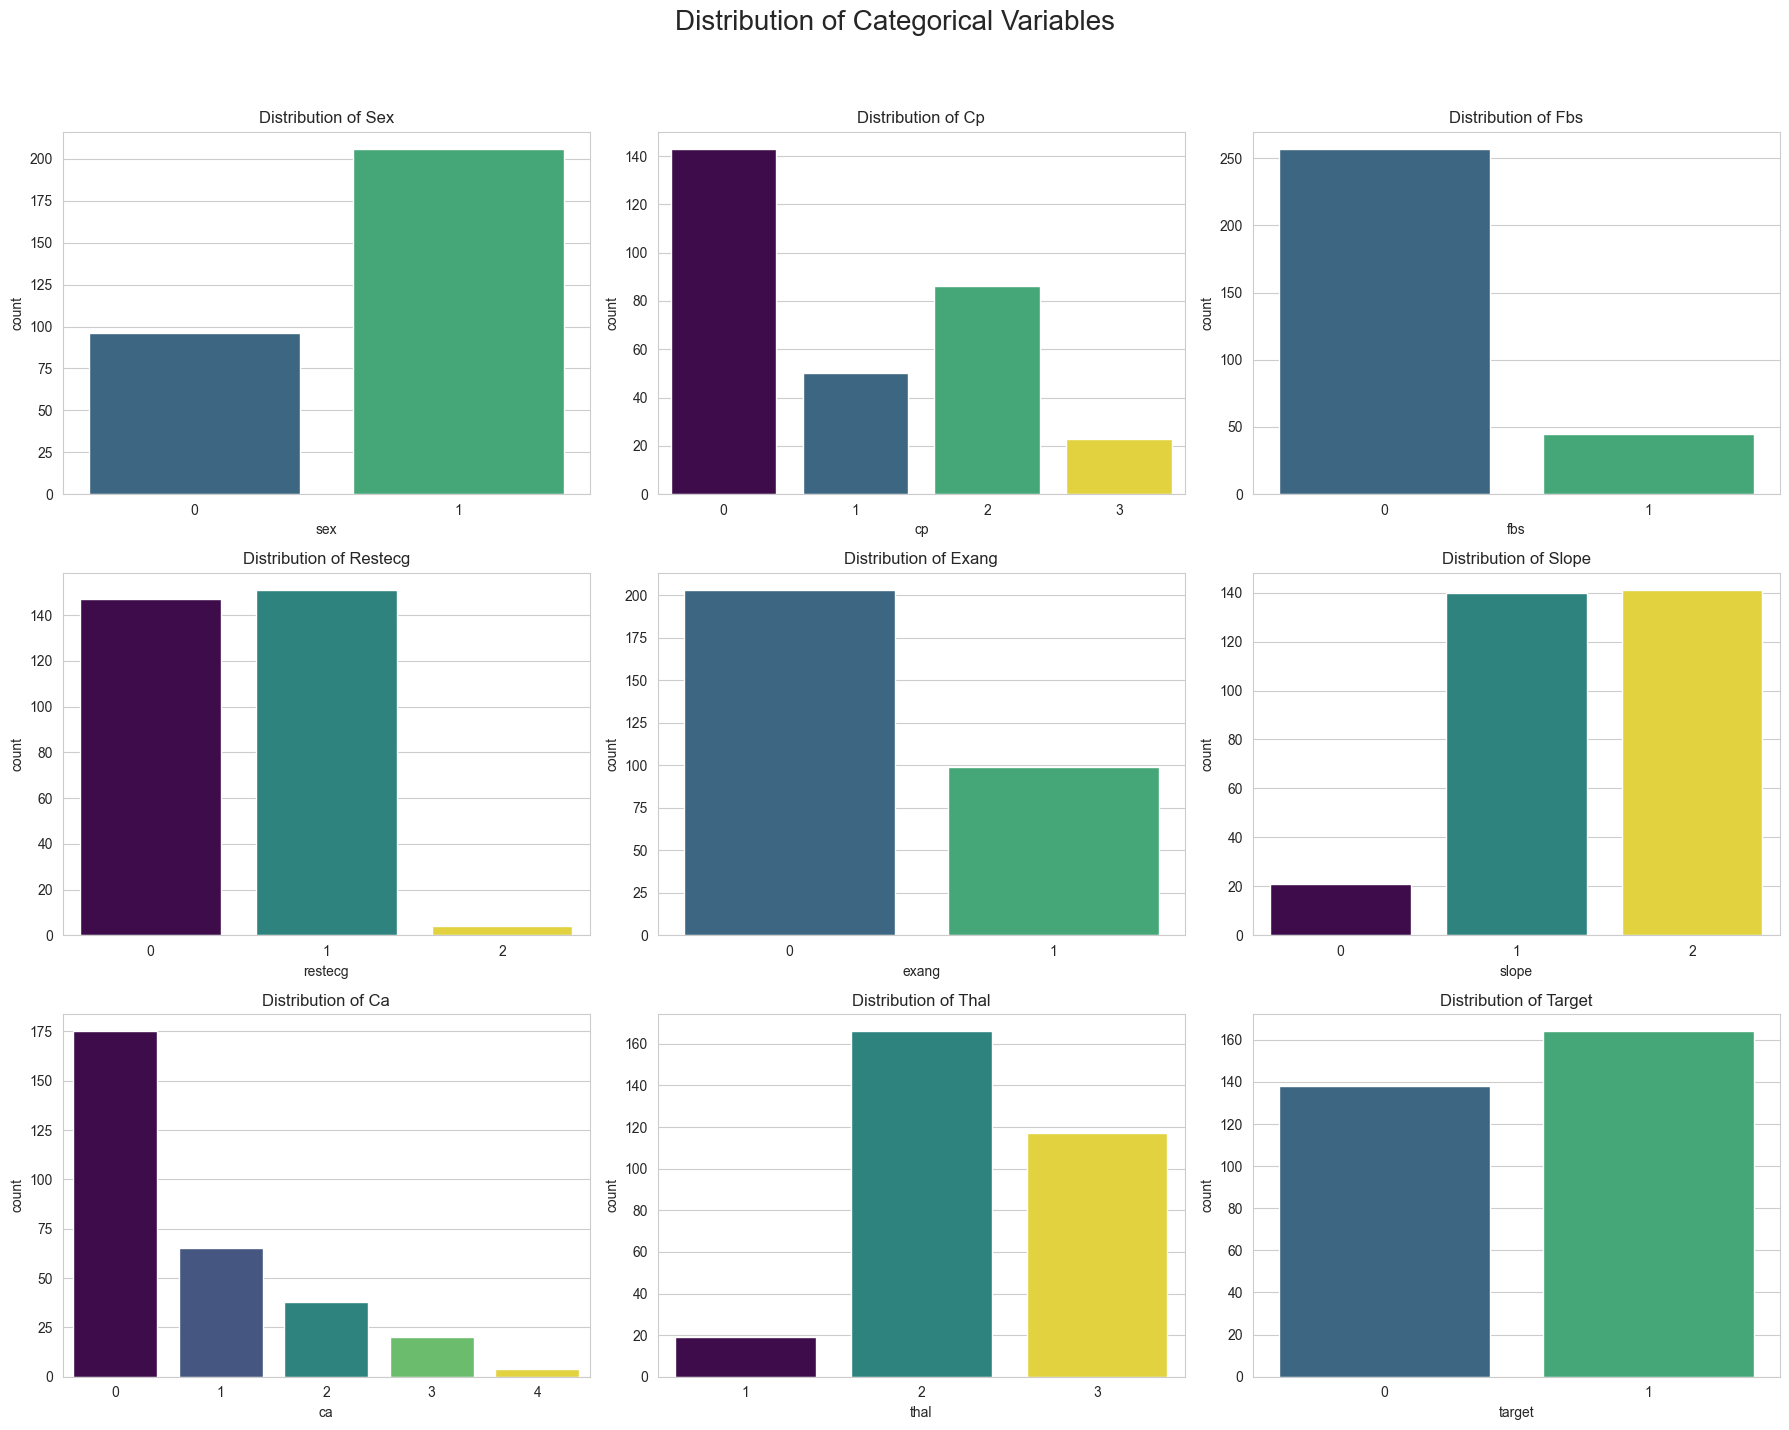

In [9]:
# --- Explore Categorical Variables ---
# CORRECTED the variable names to match the actual columns in your data
categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('Distribution of Categorical Variables', fontsize=20)

# Loop through the variables and create a count plot for each
for i, var in enumerate(categorical_vars):
    row, col = i // 3, i % 3
    # FIX for FutureWarning: Assign the variable to 'hue' to use a palette and disable the legend
    sns.countplot(x=var, data=df, ax=axes[row, col], hue=var, palette='viridis', legend=False)
    axes[row, col].set_title(f'Distribution of {var.title()}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('../reports/figures/categorical_distributions.png', bbox_inches='tight')
plt.show()

### 6: Occurrence of Heart Disease across Age

C:\Users\ThapeloMasebe\AppData\Local\Temp\ipykernel_52240\2457019085.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='trestbps', data=df, palette='coolwarm')


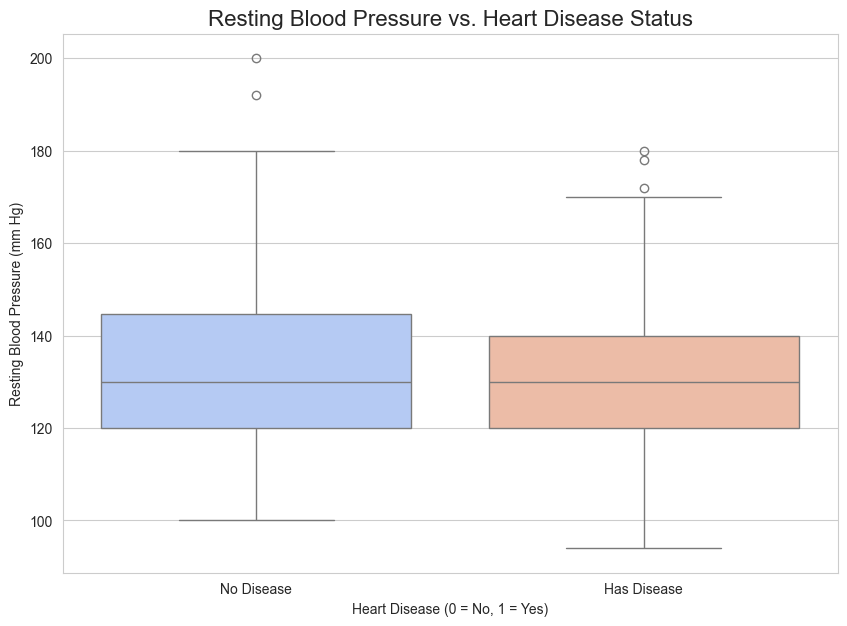

In [10]:
# --- Resting Blood Pressure vs. Heart Disease ---
plt.figure(figsize=(10, 7))
# CORRECTED 'output' to 'target' and 'trtbps' to 'trestbps'
sns.boxplot(x='target', y='trestbps', data=df, palette='coolwarm')
plt.title('Resting Blood Pressure vs. Heart Disease Status', fontsize=16)
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Resting Blood Pressure (mm Hg)')
plt.xticks([0, 1], ['No Disease', 'Has Disease']) # More descriptive labels
plt.savefig('../reports/figures/bp_vs_heart_disease.png', bbox_inches='tight')
plt.show()

### 8: Patient Composition by Gender

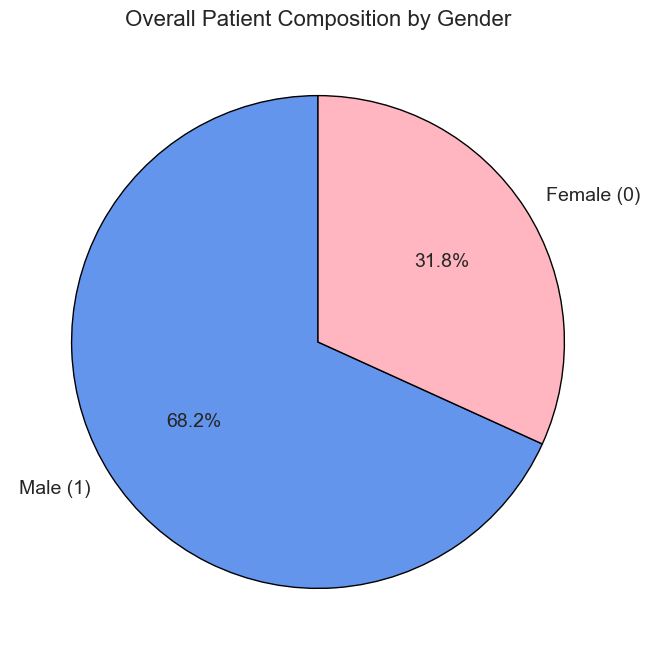

In [11]:
# --- Patient Composition by Gender ---
plt.figure(figsize=(8, 8))
df['sex'].value_counts().plot.pie(
autopct='%1.1f%%', startangle=90, colors=['#6495ED', '#FFB6C1'],
labels=['Male (1)', 'Female (0)'], textprops={'fontsize': 14},
wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)
plt.title('Overall Patient Composition by Gender', fontsize=16)
plt.ylabel('') # Hide the 'sex' label on the y-axis
plt.savefig('../reports/figures/gender_composition.png', bbox_inches='tight')
plt.show()